# Documentação TP2 - Processamento de Linguagem Natural

## Modelo POS Tagging

Nome: Ronald Davi Rodrigues Pereira

Matrícula: 2015004437

## Introdução

POS Tagging (Part-of-speech Tagging) é uma tarefa que consiste em marcar uma determinada palavra em um texto (corpus), baseando-se em seu contexto e sua definição, como correspondente à uma classe de palavras, como por exemplo Substantivos, Artigos, etc. Para tal tarefa, foi proposto um modelo de rede neural LSTM (Long Short-Term Memory), de modo que se pudesse considerar fatores temporais em uma rede recorrente.

## Tarefa

A tarefa proposta utilizou do corpus [MacMorpho](http://nilc.icmc.usp.br/macmorpho/macmorpho-v3.tgz) da USP como base de treinamento, teste e validação do modelo em que se possui classificações de classes gramaticais de palavras em português.

Desse modo, a tarefa foi a de realizar a criação de um modelo, da qual foi escolhida uma rede neural do tipo LSTM. Essa rede, teoricamente, possui um fator relevante que a deixa com uma vantagem clara frente às outras demais redes ou modelos de aprendizagem de máquina: o fator temporal é considerado. Portanto, em uma sentença, é comum estruturas iguais, em relação ao POS Tagging, formando frases com sentidos distintos e isso favorece a utilização de um modelo que consegue levar em consideração a previsão de uma tag baseada em uma tag anterior, pois a ordem em que elas aparecem na frase é considerada.

## Metodologia

Inicialmente, foi necessário realizar diferentes operações de limpeza e pre-processamento dos dados do corpus. Para tal, foi necessário primeiramente montar um conjunto que representa o meu vocabulário, contendo todas as palavras que o corpus contém. Logo após, foi utilizado uma estratégia de one-hot encoding para cada palavra, de modo a representar aquela palavra dentro do vocabulário. Porém, como um modelo de rede neural necessita de entradas de mesmo tamanho, foi necessário incluir tags de padding ao final das sentenças, afim de deixar todas elas com a mesma dimensão. O mesmo processo foi realizado para o embedding, pre-processamento, encoding e padding das tags das palavras.

Já para a construção do modelo de predição da LSTM, foi utilizado o framework Keras em conjunto com o backend do framework Tensorflow para GPUs, afim de tornar o processo de treinamento mais ágil. Para a primeira camada da rede, foi utilizada uma camada de entrada (InputLayer) de tamanho igual ao tamanho da maior sentença no meu corpus. Logo após, foi utilizada uma camada de Embedding para transformar as palavras dadas pela camada de entrada da rede em vetores densos de tamanhos fixos. Essa estratégia foi utilizada de modo a facilitar a representação de palavras na rede neural como um todo e aumentar a eficiência dos cálculos realizados por ela. Logo após essa primeira camada escondida, foi utilizada uma outra camada escondida de LSTM bidirecional. A escolha pela LSTM já foi explicada anteriormente, porém ela ser bidirecional se dá pelo fato de que, para uma previsão com uma maior acurácia, o modelo consegue considerar tags tanto anteriores quanto futuras de determinadas palavras, aumentando ainda mais o fator temporal da LSTM. Isso ajudou a aumentar consideravelmente a acurácia das previsões, uma vez que a rede conseguia considerar um contexto mais completo (contendo mais palavras e suas tags) para futuras previsões. Já como última camada escondida, foi utilizada uma camada Densa, de forma a conectar regularmente a rede neural de maneira comum à camada de ativação softmax, que considera a classe de maior probabilidade prevista pela rede e a passa para a camada de saída.

Para métricas da rede, foram utilizadas diversas funções. Para o cálculo da perda (loss) da rede, foi utilizada a métrica de categorical_crossentropy. Essa função foi utilizada pelo fato do meu vetor target (y_train) estar também em one-hot encoding (por isso o categorical e não o sparse) e pelo fato dessa ser uma das principais métricas de avaliação de modelos de classificação. Para o otimizador, foi utilizado o otimizador Adam, com uma taxa de aprendizado de $0.001$ (esse valor utilizado foi encontrado com testes empíricos por meio de execuções da fase de treinamento). Já para as métricas, foram utilizadas duas funções: acurácia e acurácia customizada, que nada mais é que uma acurácia que ignora uma das classes de tags para o seu cálculo. Nesse caso, foi ignorada a classe de padding, pois a rede acertava com uma grande probabilidade essas tags, que apareciam frequentemente e isso "mascarava" a acurácia total do modelo.

## Resultados

Abaixo serão discutidos os resultados alcançados pelo modelo de POS Tagging proposto anteriomente.

In [1]:
# Dicionário de resultados da execução do conjunto de teste na rede

results = {'ART': {'correct': 10393, 'total': 10640, 'accuracy': 0.9767857142857143},
           'N': {'correct': 29350, 'total': 31047, 'accuracy': 0.9453409347118884},
           'PREP': {'correct': 13466, 'total': 13966, 'accuracy': 0.9641987684376343},
           'NPROP': {'correct': 11316, 'total': 14132, 'accuracy': 0.8007359184828757},
           'ADV': {'correct': 2996, 'total': 3701, 'accuracy': 0.8095109429883816},
           'V': {'correct': 14399, 'total': 15331, 'accuracy': 0.9392081403691867},
           'PDEN': {'correct': 708, 'total': 847, 'accuracy': 0.8358913813459268},
           'PREP+ART': {'correct': 8998, 'total': 9108, 'accuracy': 0.9879227053140096},
           'PU': {'correct': 21057, 'total': 21059, 'accuracy': 0.9999050287288095},
           '<pad>': {'correct': 1737219, 'total': 1737221, 'accuracy': 0.9999988487359984},
           'KC': {'correct': 3446, 'total': 3569, 'accuracy': 0.9655365648641075},
           'ADJ': {'correct': 5481, 'total': 6534, 'accuracy': 0.8388429752066116},
           'KS': {'correct': 1418, 'total': 1871, 'accuracy': 0.757883484767504},
           'ADV-KS': {'correct': 108, 'total': 164, 'accuracy': 0.6585365853658537},
           'PROADJ': {'correct': 2121, 'total': 2254, 'accuracy': 0.9409937888198758},
           'PCP': {'correct': 2516, 'total': 3025, 'accuracy': 0.8317355371900826},
           'NUM': {'correct': 2283, 'total': 2576, 'accuracy': 0.8862577639751553},
           'PROPESS': {'correct': 1547, 'total': 1683, 'accuracy': 0.9191919191919192},
           'PROSUB': {'correct': 732, 'total': 931, 'accuracy': 0.7862513426423201},
           'CUR': {'correct': 415, 'total': 416, 'accuracy': 0.9975961538461539},
           'PRO-KS': {'correct': 1416, 'total': 1693, 'accuracy': 0.8363851151801536},
           'PREP+PROSUB': {'correct': 84, 'total': 116, 'accuracy': 0.7241379310344828},
           'PREP+PRO-KS': {'correct': 17, 'total': 33, 'accuracy': 0.5151515151515151},
           'PREP+PROADJ': {'correct': 266, 'total': 271, 'accuracy': 0.981549815498155},
           'PREP+PROPESS': {'correct': 75, 'total': 77, 'accuracy': 0.974025974025974},
           'IN': {'correct': 12, 'total': 48, 'accuracy': 0.25},
           'PREP+ADV': {'correct': 6, 'total': 7, 'accuracy': 0.8571428571428571}}

Com esses resultados acima, podemos plotar gráficos de barra para comparar a acurácia de classificações de determinadas tags no modelo.

In [2]:
import matplotlib.pyplot as plt

In [3]:
matplotlib inline

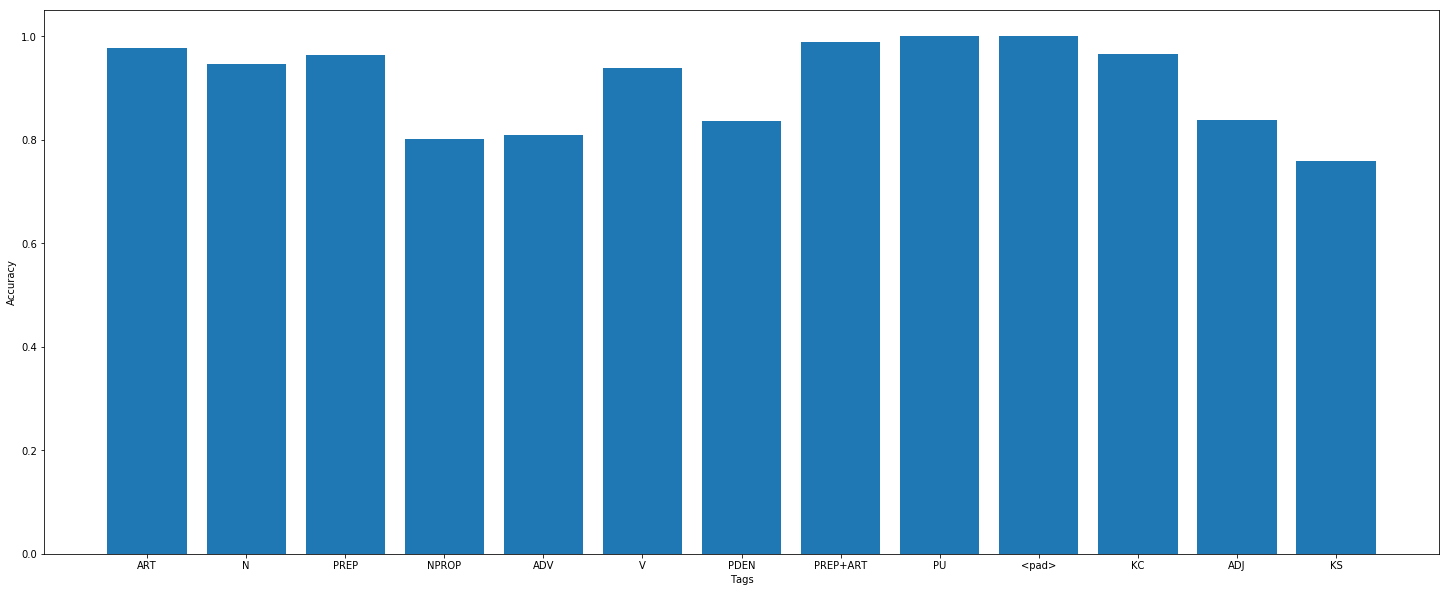

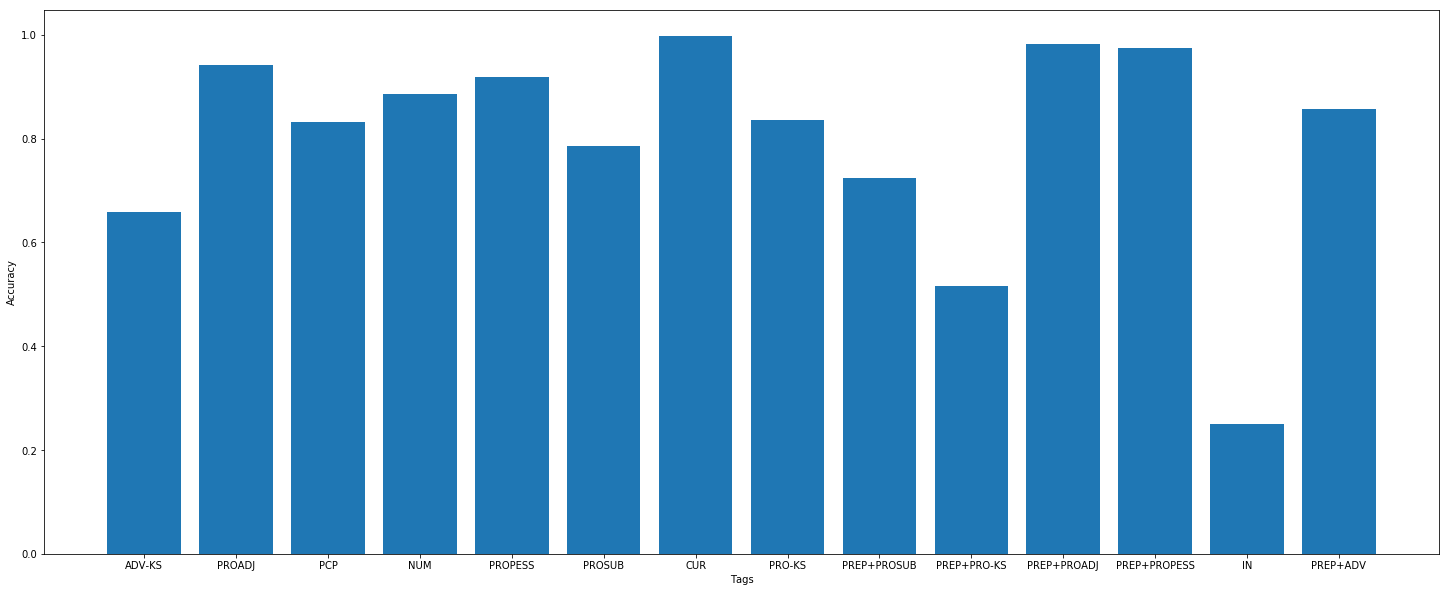

In [4]:
resultTags = list(results.keys())

accuracyTags = []
for tag in resultTags:
    accuracyTags.append(results[tag]['accuracy'])

plt.figure(figsize=(25,10))
plt.bar(resultTags[:13], accuracyTags[:13])
plt.xlabel('Tags')
plt.ylabel('Accuracy')
plt.figure(figsize=(25,10))
plt.bar(resultTags[13:], accuracyTags[13:])
plt.xlabel('Tags')
plt.ylabel('Accuracy')
plt.show()

Desse modo, podemos concluir que, em geral, a acurácia para previsões de determinadas tags está satisfatoriamente alta.

Para tags que acontecem frequentemente (Artigos, por exemplo), a acurácia foi alta, de modo a atestar que, quanto maior dados de treino um modelo possui, melhor são as suas previsões. Por outro lado, para tags que não são tão frequentes (Interjeições, por exemplo), essa acurácia foi substancialmente menor.

Essas afirmações podem ser observadas no plot abaixo, em que relaciona o total de vezes que uma tag aparece com a sua acurácia nas previsões do modelo.

Obs: Para melhor visualização, foi ignorada a classe de padding.

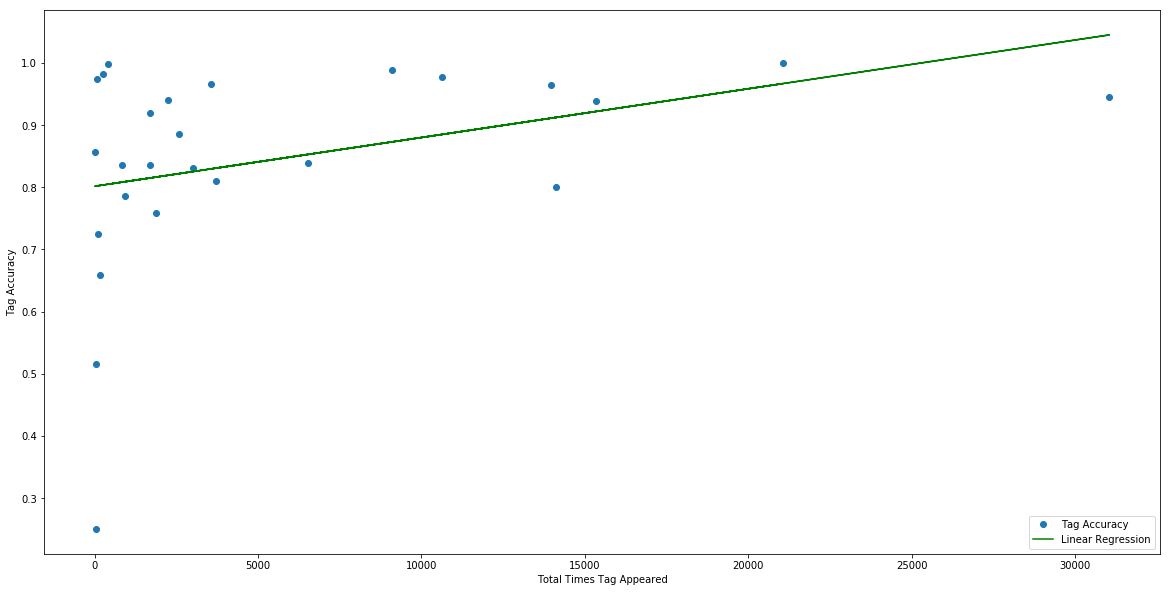

In [5]:
from pylab import polyfit, poly1d

ignorePadAccuracyTags = []
for tag in resultTags:
    if tag != '<pad>':
        ignorePadAccuracyTags.append(results[tag]['accuracy'])

ignorePadTotalTags = []
for tag in resultTags:
    if tag != '<pad>':
        ignorePadTotalTags.append(results[tag]['total'])
        
fit = polyfit(ignorePadTotalTags, ignorePadAccuracyTags, 1)
fit_fn = poly1d(fit)

plt.figure(figsize=(20,10))
plt.plot(ignorePadTotalTags, ignorePadAccuracyTags, 'o', label='Tag Accuracy')
plt.plot(ignorePadTotalTags, fit_fn(ignorePadTotalTags), 'g-', label='Linear Regression')
plt.legend(loc=4)
plt.xlabel('Total Times Tag Appeared')
plt.ylabel('Tag Accuracy')
plt.show()

As métricas do modelo ao final foi de:

- Tempo de treinamento: 1 hora 21 minutos e 42 segundos ($1:21:42$)
- Loss no conjunto de treinamento: $1.6490*10^{-4}$
- Acurácia total no conjunto de treinamento: $1.0000$
- Acurácia ignorando o padding no conjunto de treinamento: $0.9996$
- Loss no conjunto de validação: $0.0334$
- Acurácia total no conjunto de validação: $0.9947$
- Acurácia ignorando o padding no conjunto de validação: $0.9313$

In [6]:
import numpy as np
    
testAcc = np.mean(accuracyTags)
testIgnorePadAcc = np.mean(ignorePadAccuracyTags)

print('Acurácia total no conjunto de teste: %.4f' %testAcc)
print('Acurácia ignorando o padding no conjunto de teste: %.4f' %testIgnorePadAcc)

Acurácia total no conjunto de teste: 0.8511
Acurácia ignorando o padding no conjunto de teste: 0.8454


## Conclusão

Podemos concluir que o modelo obteve ótimos resultados frente à difícil tarefa de POS Tagging. Com base nos resultados obtidos, é possível afirmar que a acurácia das previsões é diretamente proporcional à frequência de aparecimento da tag em questão no conjunto de treinamento. O modelo LSTM obteve uma acurácia no conjunto de teste de 85%, aproximadamente, o que é um ótimo resultado frente à diversos outros modelos que poderiam ser propostos.

Esse trabalho também foi interessante pelo fato de possibilitar o aprendizado de uma construção de uma rede neural por meio do framework Keras e aplicar técnicas de processamento de linguagem natural. Desse modo, foi possível aplicar alguns conhecimentos teóricos na prática, consolidando ainda mais a matéria.